In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

import check_file as ch

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv('E:\\DBDA\\ML\\7. Day07-Model Training & Tuning[13.12.19]\\diabetes.csv')

# Take a look at the first few rows of the dataset
diabetes.head()
diabetes.shape

(768, 9)

In [2]:
diabetes.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
Diabetes = diabetes[diabetes['Outcome']==1]
No_Diabetes = diabetes[diabetes['Outcome']==0]

In [4]:
Diabetes.shape

(268, 9)

In [5]:
No_Diabetes.shape

(500, 9)

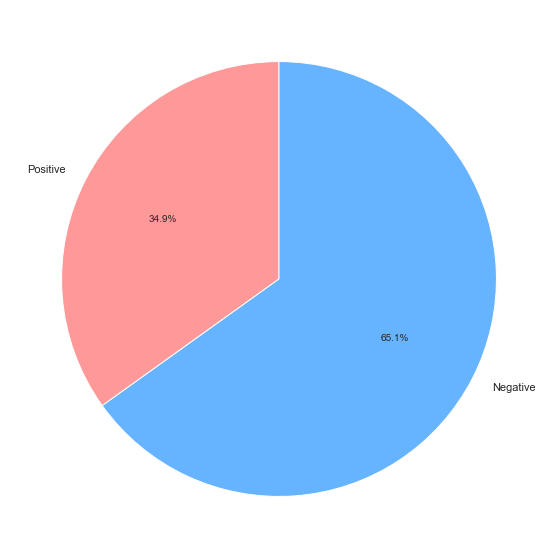

In [6]:
pos = Diabetes['Age'].count()
neg = No_Diabetes['Age'].count()
lis = [pos,neg]
label = ['Positive','Negative']
f,ax = plt.subplots(figsize=(10,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(lis,labels=label,autopct='%1.1f%%',shadow=False, startangle=90,colors=colors)
plt.show()

In [7]:
print("**********OVERALL DECRIPTION OF DATASET****************\n")
print(diabetes.describe())

**********OVERALL DECRIPTION OF DATASET****************

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11

In [8]:
print("**********Description of Diabetic Females****************\n")
print(Diabetes.describe())


**********Description of Diabetic Females****************

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   268.000000  268.000000     268.000000     268.000000  268.000000   
mean      4.865672  141.257463      70.824627      22.164179  100.335821   
std       3.741239   31.939622      21.491812      17.679711  138.689125   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.750000  119.000000      66.000000       0.000000    0.000000   
50%       4.000000  140.000000      74.000000      27.000000    0.000000   
75%       8.000000  167.000000      82.000000      36.000000  167.250000   
max      17.000000  199.000000     114.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  268.000000                268.000000  268.000000    268.0  
mean    35.142537                  0.550500   37.067164      1.0  
std      7.262967                  0.372354   10.968254

In [9]:
print("**********Description of Non-Diabetic Females****************\n")
print(No_Diabetes.describe())

**********Description of Non-Diabetic Females****************

       Pregnancies   Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.0000     500.000000     500.000000  500.000000   
mean      3.298000  109.9800      68.184000      19.664000   68.792000   
std       3.017185   26.1412      18.063075      14.889947   98.865289   
min       0.000000    0.0000       0.000000       0.000000    0.000000   
25%       1.000000   93.0000      62.000000       0.000000    0.000000   
50%       2.000000  107.0000      70.000000      21.000000   39.000000   
75%       5.000000  125.0000      78.000000      31.000000  105.000000   
max      13.000000  197.0000     122.000000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  Outcome  
count  500.000000                500.000000  500.000000    500.0  
mean    30.304200                  0.429734   31.190000      0.0  
std      7.689855                  0.299085   11.667655      0.0  
mi

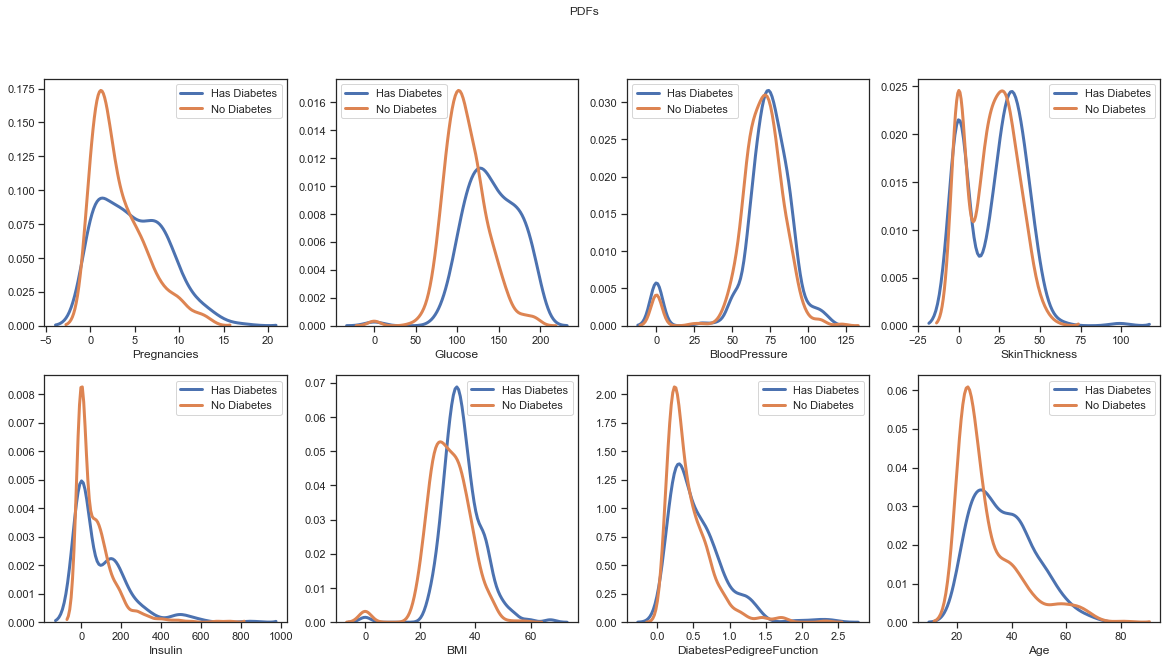

In [11]:
f, axes = plt.subplots(2, 4,figsize=(20,10))
count=0

for i in range(2):
    for j in range(4):
        
        sns.distplot(Diabetes.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Has Diabetes',ax = axes[i][j])
        sns.distplot(No_Diabetes.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'No Diabetes',ax = axes[i][j])
        axes[i][j].legend()
        count=count+1
        
f.suptitle('PDFs')
plt.show()

In [12]:
g = ggplot(diabetes, aes(Pregnancies))
g + geom_bar(aes(group=Outcome)) + facet_wrap(~Outcome) + theme(legend.position = "none")

SyntaxError: keyword can't be an expression (<ipython-input-12-4a1024169cd7>, line 2)

In [15]:
from ggplot import *
import pandas as pd
#df = pd.DataFrame({"x":[1,2,3,4], "y":[1,3,4,2]})
#ggplot(aes(x="x", weight="y"), df) + geom_bar()

AttributeError: module 'pandas' has no attribute 'tslib'

In [ ]:
!pip install pandas==0.19.2

In [14]:
!pip install ggplot